## 8.2

In [45]:
import numpy as np
import random
import matplotlib.pyplot as plt

## 8.3

In [46]:
# init parameter Ga
list_brng = [[5,20],[7,90],[3,50],[6,60],[1,100],[9,30],[4,30],[4,30],[6,70],[4,50]]

# prioritasi
max_weight = 25
uk_populasi = 50
max_generasi = 100
bts_bawah = 0
bts_atas = 15
jum_var = len(list_brng)
jum_gen_per_var = 1
jum_gen = jum_var * jum_gen_per_var
pc = 0.8
pm = 1/jum_gen
best_kromosom = []
best_fitness = 0
best_genotipe = []
list_best_fitness = []
max_fitness = 99999

## 8.4

In [47]:
# init populasi biner
kromosom = np.round(np.random.rand(uk_populasi,jum_gen))

## 8.5


In [48]:
def hitung_fitness(x,list_brg,max_weight):
    total_weight = 0
    for i in range(len(x)):
        total_weight += x[i]*list_brg[i][0]
    fitness = 0
    if (total_weight <= max_weight):
        for j in range(len(x)):
            fitness += x[j]*list_brg[j][1]
        fitness -= (max_weight - total_weight)
    else:
        fitness = 0
    return fitness,total_weight

## 8.6

In [49]:
def linear_fitness_ranking(fitness):
    sort_fitness = sorted(fitness)
    max_fitness = sort_fitness[-1]
    min_fitness = sort_fitness[0]
    LFR =[]
    for i in range(uk_populasi):
        LFR.append(max_fitness - (max_fitness - min_fitness)* ((i+1)-1)/(uk_populasi-1))
    return LFR

## 8.7

In [50]:
def roulette_wheel (krom,fitness):
    LFR = linear_fitness_ranking(fitness)
    kumulatif_fitness = 0
    acak = random.uniform(0,1)
    idx_induk = 0
    for i in range(uk_populasi):
        kumulatif_fitness = kumulatif_fitness + LFR[i]/sum(LFR)
        if (kumulatif_fitness > acak):
            idx_induk = i
            break
    return idx_induk

## 8.8

In [51]:
def crossover_1_titik(krom1,krom2):
    krom1 = list(krom1)
    krom2 = list(krom2)
    
    titik = int(np.fix(np.random.rand()*jum_gen)+1)
    
    anak1 = krom1[0:titik] + krom2[titik:]
    anak2 = krom2[0:titik] + krom1[titik:]
    
    return anak1,anak2

## 8.9

In [52]:
def crossover_N_titik(krom1,krom2,jum_titik_ptg):
    krom1 = list(krom1)
    krom2 = list(krom2)
    batas = 0
    titik = []
    pembagi = int(np.fix(jum_gen/jum_titik_ptg))
    for i in range(jum_titik_ptg):
        acak = int(np.fix(np.random.rand()*pembagi)+1)
        batas = batas + acak
        titik.append(batas)
    titik.append(jum_gen)
    
    anak1 = []
    anak2 = []
    idx = 0
    for i in range(len(titik)):
        #tukar gen selang seling antara krom1 dan krom2
        if (i % 2 == 0):
            anak1 = anak1 + krom1[idx:titik[i]]
            anak2 = anak2 + krom2[idx:titik[i]]
        else:
            anak1 = anak1 + krom2[idx:titik[i]]
            anak2 = anak2 + krom1[idx:titik[i]]
        idx = titik[i]
    return anak1, anak2

## 8.10

In [53]:
def crossover_uniform(krom1,krom2):
    pola = np.round(np.random.rand(jum_gen))
    anak1 = krom1
    anak2 = krom2
    for i in range(jum_gen):
        if (pola[i] == 1):
            anak1[i],anak2[i] = anak2[i],anak1[i]
    return anak1,anak2

## 8.11

In [54]:
def mutasi_biner(krom):
  acak = random.uniform(0,1)
  for j in range(jum_gen):
    if (acak <= pm):
      krom[j] = 1 - krom[j]
  return krom

## 8.12

In [55]:
#------------------------------------------------------------------------------------
# Proses evolusi kromosom
#------------------------------------------------------------------------------------
generasi = 0
while (generasi < max_generasi and best_fitness < max_fitness):
  # evaluasi fitness
  fitness = []
  for j in range(uk_populasi):
    fit, tot = hitung_fitness(kromosom[j], list_brng, max_weight)
    fitness.append(fit)

    if (best_fitness < fit):
      best_fitness = fit
      total_berat = tot
      idx_best_kromosom = j
      best_kromosom = kromosom[j].copy()
      best_genotipe = best_kromosom.copy() # Karena tidak ada dekode kromosom

  # Simpan best_fitness dari semua kromosom di tiap generasi
  list_best_fitness.append(best_fitness)

  # tampilkan informasi tiap generasi
  print("Generasi ke-" + str(generasi) + "==>" + str(best_genotipe) + "=" + str(best_fitness) + " (" + str(total_berat) + "kg)")

  # elitisme
  kromosom_anak = []
  if (uk_populasi % 2 == 0):
    kromosom_anak.append(best_kromosom.copy())
    kromosom_anak.append(best_kromosom.copy())
    iterasi_seleksi = 2
  else:
    kromosom_anak.append(best_kromosom.copy())
    iterasi_seleksi = 1

  # seleksi induk/orang tua
  idx_induk = []
  for i in range(iterasi_seleksi, uk_populasi):
    idx_induk.append(roulette_wheel(kromosom, fitness))
  random.shuffle(idx_induk)

  # crossover kromosom
  jum_pasangan_induk = int(len(idx_induk) / 2)
  for i in range(jum_pasangan_induk):
    induk1 = kromosom[idx_induk[i]].copy()
    induk2 = kromosom[idx_induk[i+1]].copy()
    acak = random.uniform(0,1)

    if (acak <= pc):
      anak1, anak2 = crossover_1_titik(induk1, induk2)
      # anak1, anak2 = crossover_n_titik(induk1, induk2, jum_titik_potong=3)
      # anak1, anak2 = crossover_uniform(induk1, induk 2)
      kromosom_anak.append(anak1.copy())
      kromosom_anak.append(anak2.copy())
    else:
      kromosom_anak.append(induk1.copy())
      kromosom_anak.append(induk2.copy())
    i += 2
  
  # mutasi kromosom (kromosom elit tidak dimutasi)
  for i in range(iterasi_seleksi, uk_populasi):
    kromosom_anak[i] = mutasi_biner(kromosom_anak[i])
  
  # generational replacement
  kromosom = kromosom_anak.copy()

  generasi += 1

Generasi ke-0==>[0. 0. 1. 1. 1. 0. 1. 0. 1. 1.]=359.0 (24.0kg)
Generasi ke-1==>[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]=369.0 (24.0kg)
Generasi ke-2==>[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]=369.0 (24.0kg)
Generasi ke-3==>[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]=369.0 (24.0kg)
Generasi ke-4==>[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]=369.0 (24.0kg)
Generasi ke-5==>[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]=369.0 (24.0kg)
Generasi ke-6==>[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]=369.0 (24.0kg)
Generasi ke-7==>[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]=369.0 (24.0kg)
Generasi ke-8==>[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]=369.0 (24.0kg)
Generasi ke-9==>[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]=369.0 (24.0kg)
Generasi ke-10==>[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]=369.0 (24.0kg)
Generasi ke-11==>[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]=369.0 (24.0kg)
Generasi ke-12==>[0.0, 1.0, 0.0, 

## 8.13


[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0] = 390.0 (47) (25.0kg)
Best Kromosom = [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0]


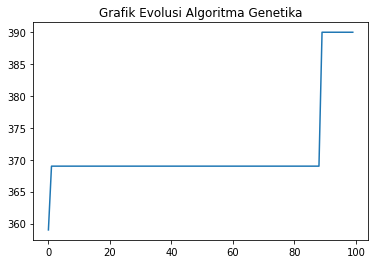

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16624\2870174386.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.waitforbuttonpress()


In [57]:
# tampilkan hasil optimasi
print(str(best_genotipe) + " = " + str(best_fitness) + " (" + str(idx_best_kromosom) + ")" + " (" + str(total_berat) + "kg)")
print("Best Kromosom = " + str(best_kromosom))
plt.title("Grafik Evolusi Algoritma Genetika")
plt.plot(list_best_fitness)
plt.show(block=False)
plt.waitforbuttonpress()